In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

This dataset is all about credit card defaulters.

It contains 5 Columns

1) ID - ID of customer

2) Default - Is the person a loan defaulter

3) Student - Is the person a student

4) Balance - balance in his/her account

5) Income - His/Her income

In [28]:
df=pd.read_csv(r"C:\Users\madhu\Downloads\credit_card_defaulter.csv")
df.head()

,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.62507
1,2,No,Yes,817.180407,12106.13470
2,3,No,No,1073.549164,31767.13895
3,4,No,No,529.250605,35704.49394
4,5,No,No,785.655883,38463.49588


In [29]:
df.shape

(10000, 5)

 Obs - There are 10000 rows and 5 columns in the dataset

In [30]:
df.isnull().sum()

Unnamed: 0    0
default       0
student       0
balance       0
income        0
dtype: int64

Obs - There is no null value

<Axes: >

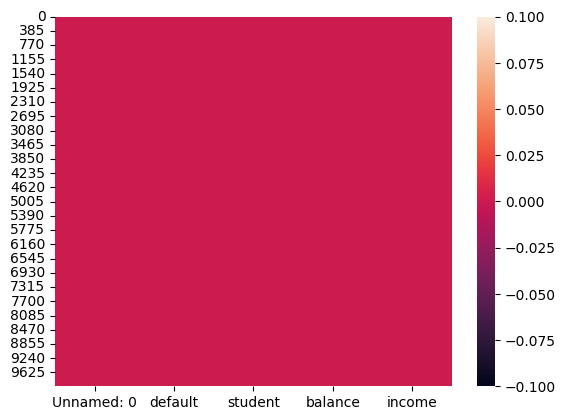

In [31]:
sns.heatmap(df.isnull())

Obs - We can see from above heatmap there is no null value

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  10000 non-null  int64  
 1   default     10000 non-null  object 
 2   student     10000 non-null  object 
 3   balance     10000 non-null  float64
 4   income      10000 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 390.8+ KB


In [33]:
df=df.drop(df[["Unnamed: 0"]],axis=1)

In [34]:
df.head()

,default,student,balance,income
0,No,No,729.526495,44361.62507
1,No,Yes,817.180407,12106.13470
2,No,No,1073.549164,31767.13895
3,No,No,529.250605,35704.49394
4,No,No,785.655883,38463.49588


In [35]:
num_columns=[]
cat_columns=[]
for i in df.columns:
  if df[i].dtype=="O":
    cat_columns.append(i)
  else:
    num_columns.append(i)

In [36]:
num_columns = [i for i in df.columns if df[i].dtype != "O"]
cat_columns = [i for i in df.columns if df[i].dtype == "O"]

In [37]:
num_columns

['balance', 'income']

In [38]:
cat_columns

['default', 'student']

# Statistical analysis

In [39]:
df.describe()

,balance,income
count,10000.000000,10000.000000
mean,835.374886,33516.981876
std,483.714985,13336.639563
min,0.000000,771.967729
25%,481.731105,21340.462905
50%,823.636973,34552.644800
75%,1166.308387,43807.729275
max,2654.322576,73554.233500


OBs - from above chart we found the avg balance is 835 and avg income 33516
    , min balance 0 and min income 771
    , max balance 2454 and max income 73554

<Axes: >

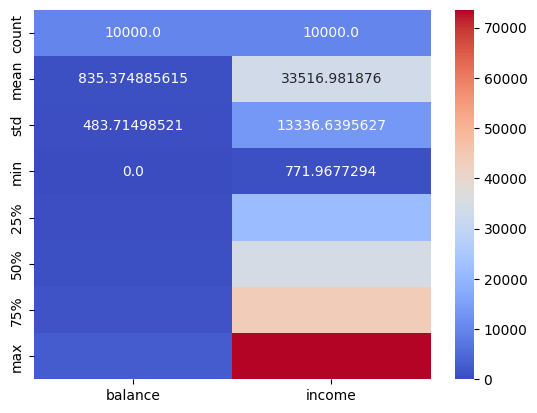

In [40]:
sns.heatmap(df.describe(),annot=True,fmt=".12",cmap="coolwarm")

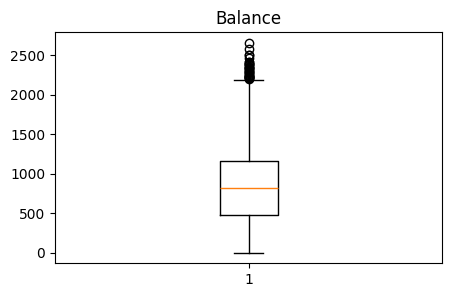

In [41]:
plt.figure(figsize=[5,3])
plt.boxplot(df["balance"])
plt.title("Balance")
plt.show()



Obs - here is some outliers in balance

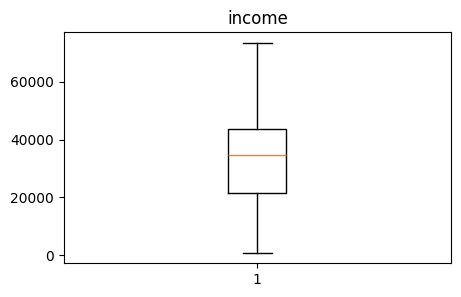

In [42]:
plt.figure(figsize=[5,3])
plt.boxplot(df["income"])
plt.title("income")
plt.show()

Obs - No outliers present here

<Axes: xlabel='balance', ylabel='Count'>

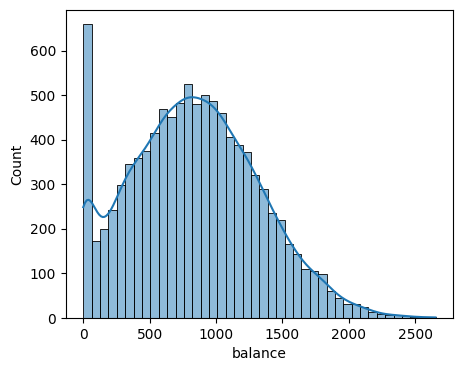

In [43]:
plt.figure(figsize=[5,4])

sns.histplot(df["balance"],kde=True)

<Axes: xlabel='income', ylabel='Count'>

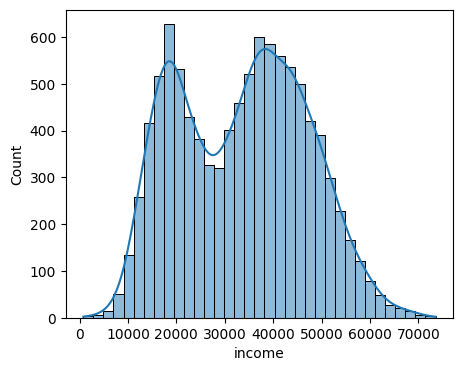

In [44]:
plt.figure(figsize=[5,4])

sns.histplot(df["income"],kde=True)

In [45]:
df.columns

Index(['default', 'student', 'balance', 'income'], dtype='object')

# Correlation

In [46]:

corr=df['balance'].corr(df["income"])
corr

-0.15224340058656727

In [47]:
sns.heatmap(corr,annot=True,fmt=".0%",cmap="ocean")

ValueError: Must pass 2-d input. shape=()

Obs -
     income and balance are negatively correlated
     

# Default

<Axes: xlabel='default', ylabel='Count'>

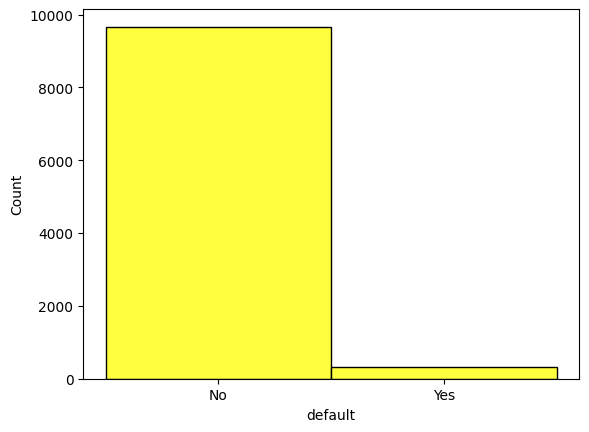

In [48]:
sns.histplot(df["default"],color="yellow")

Obs - There is more number of people are from non credit card defaulter

# Student

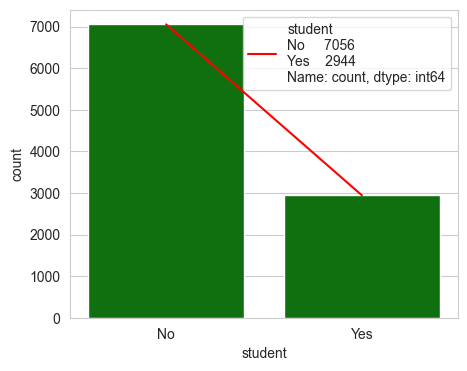

In [49]:
sns.set_style("whitegrid")
plt.figure(figsize=[5,4])
c=df["student"].value_counts()
sns.countplot(data=df,x="student",color="green")
plt.plot(c,color='red',label=c)
plt.legend()
plt.show()

Obs - There is less number of student 2944 and 7056 are non student

# Balance

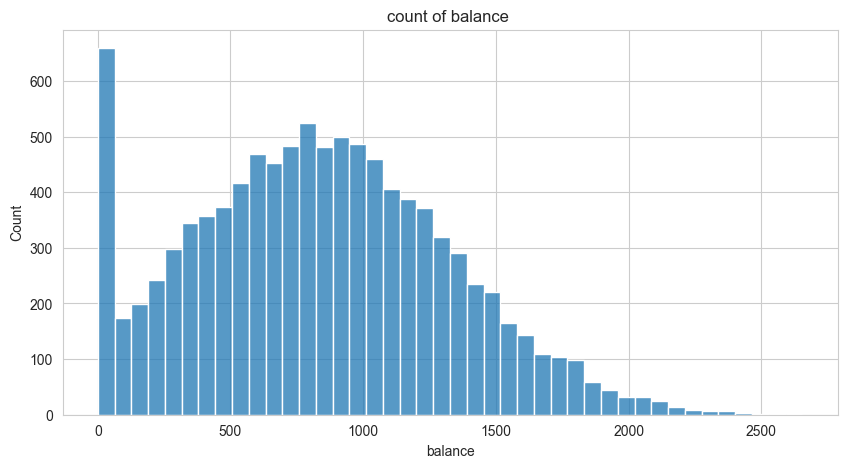

In [50]:
sns.set_style("whitegrid")
plt.figure(figsize=[10,5])
sns.histplot(df["balance"],palette="'viridis'")
plt.title("count of balance ")
plt.show()

Obs - Average people have balance under 1500 , less peaople have balance more than that

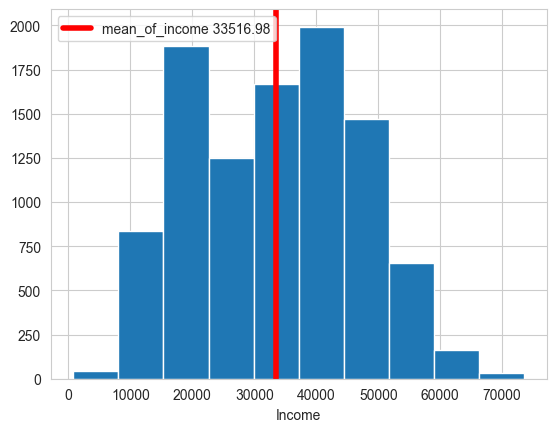

In [51]:
df["income"].hist()
Mean=df["income"].mean()
plt.axvline(Mean,linewidth=4,color='red',label=('mean_of_income %0.2f'%Mean))
plt.xlabel("Income")
plt.legend()
plt.show()

Obs -  MOst of the people have there income average of 33516.98

# Default vs income

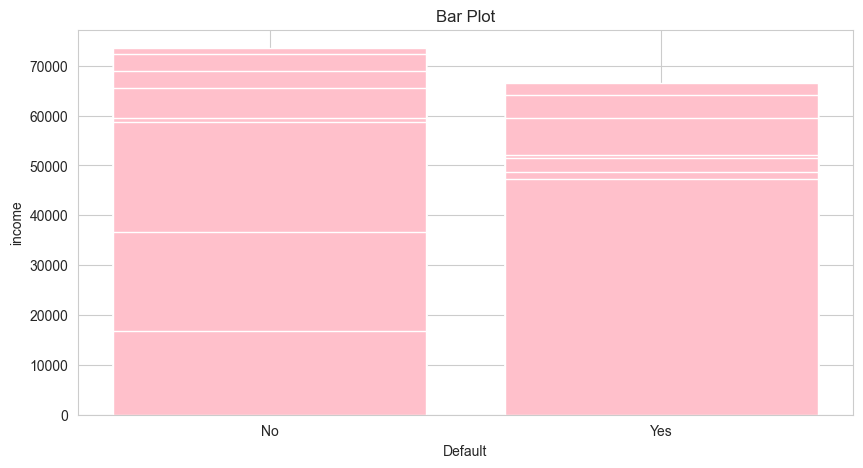

In [52]:
plt.figure(figsize=[10,5])
plt.bar(df['default'], df['income'],color="pink")
plt.xlabel('Default')
plt.ylabel('income')
plt.title('Bar Plot')
plt.show()


Obs - As compare to default people have more income who has no deafult loan

# Student vs income

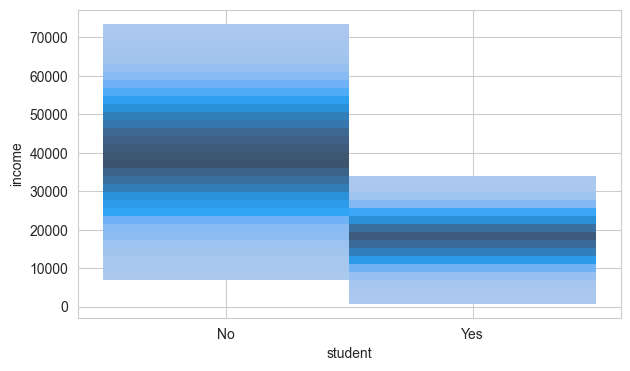

In [53]:
plt.figure(figsize=[7,4])
sns.histplot(data=df,x="student",y="income",palette="Set3")
plt.show()

Obs - students are having less income of between 0-3500

---------non student people having income upto 70000

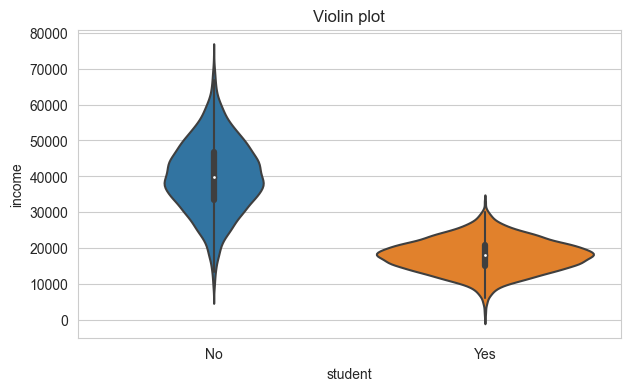

In [54]:
plt.figure(figsize=[7,4])
sns.violinplot(data=df,x="student",y="income")
plt.title("Violin plot")
plt.show()

Obs - MOst of the students have there income average of 20000

# Balance vs Income

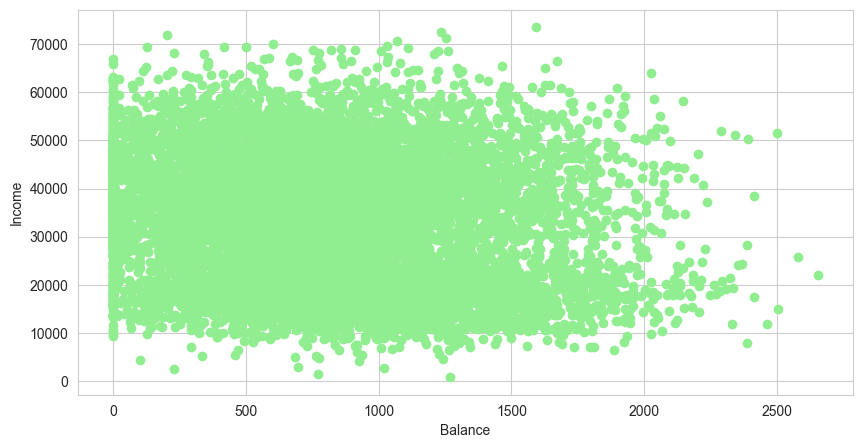

In [55]:
plt.figure(figsize=[10,5])
plt.scatter(df["balance"],df["income"],color="lightgreen")
plt.xlabel("Balance")
plt.ylabel("Income")
plt.show()

Obs - People have income between 10000-60000 and balance between 0-1500 are highly correlated

# Pair plot

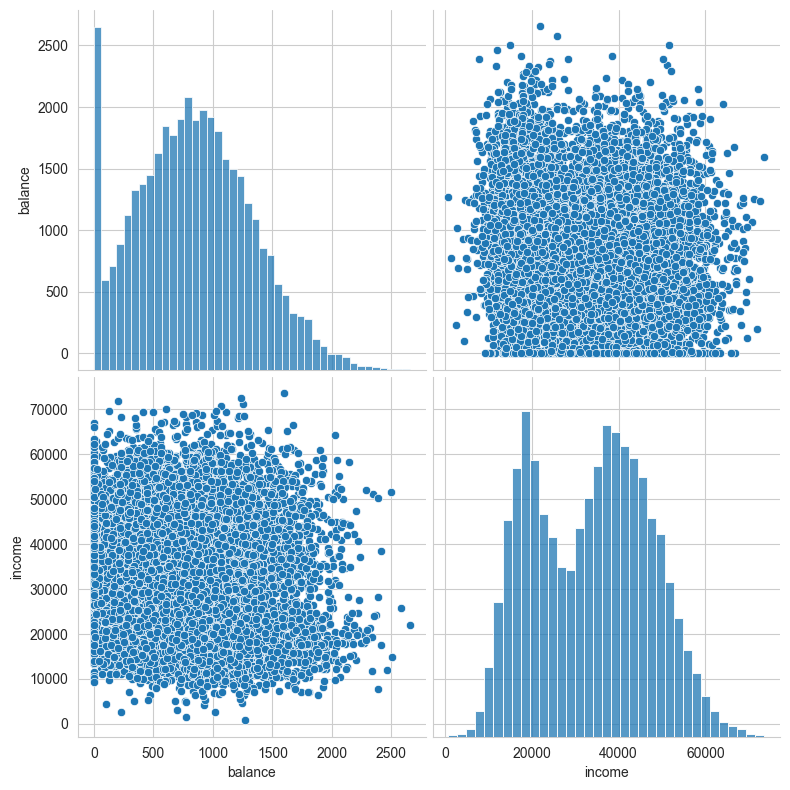

In [56]:
sns.pairplot(df,size=4)

# skeweness

In [57]:
#df.skew()

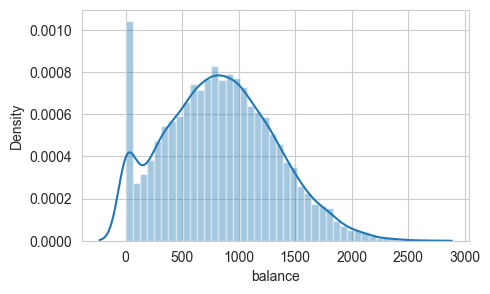

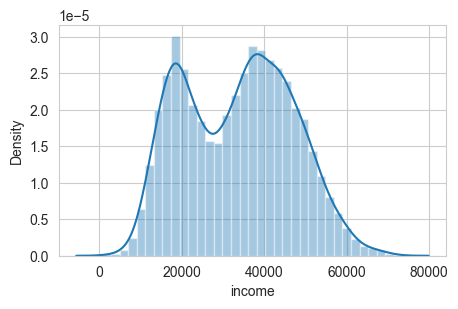

In [58]:
for i in df.columns:
  if df[i].dtypes!="O":
    plt.figure(figsize=[5,3])
    sns.distplot(df[i])
    plt.show()

Obs - There is small amount of skewed data in balance

# Data preprocessing

In [59]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
c=df.columns
for i in c:
  if df[i].dtypes=="O":
    df[i]=l.fit_transform(df[i])

In [60]:
df["student"].head()

0    0
1    1
2    0
3    0
4    0
Name: student, dtype: int32

In [61]:
df["default"].head()

0    0
1    0
2    0
3    0
4    0
Name: default, dtype: int32

# Outliers

In [62]:
#removing outliers using zscore
from scipy.stats import zscore
z_score=np.abs(zscore(df))
new_df=df[(z_score<3).all(axis=1)]

In [63]:
print(df.shape)
print(new_df.shape)

(10000, 4)
(9662, 4)


In [64]:
new_df.skew()

default    0.000000
student    0.919093
balance    0.112104
income     0.064712
dtype: float64

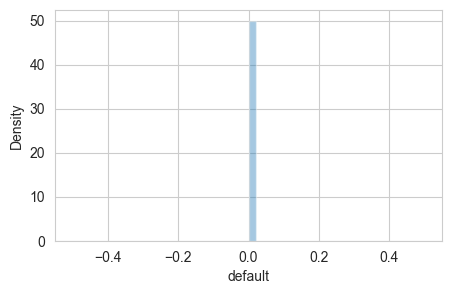

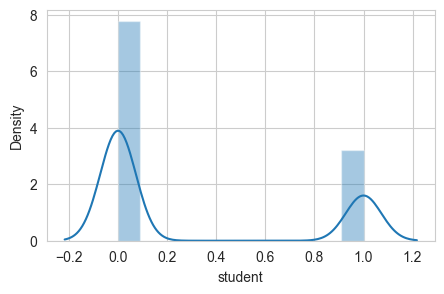

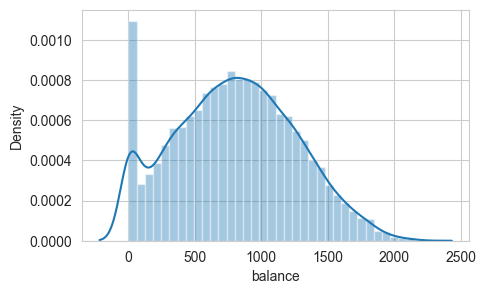

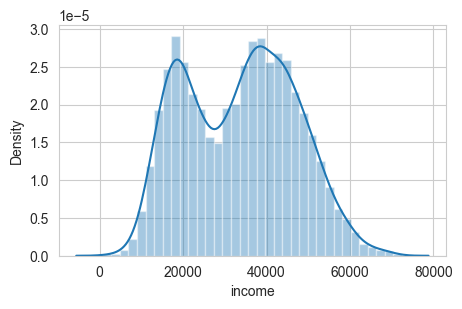

In [65]:

# check skew ness by plotting distplot
for i in new_df.columns:
  if new_df[i].dtypes!="O":
    plt.figure(figsize=[5,3])
    sns.distplot(new_df[i])
    plt.show()

In [66]:
new_df.isnull().sum()

default    0
student    0
balance    0
income     0
dtype: int64

# Data standardisation


In [67]:
from sklearn.preprocessing import MinMaxScaler
df_x=new_df.drop(new_df[["income"]],axis=1)
y=new_df[["income"]]
m=MinMaxScaler()
x=m.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [68]:
x.shape

(9662, 3)

In [69]:
y.shape

(9662, 1)

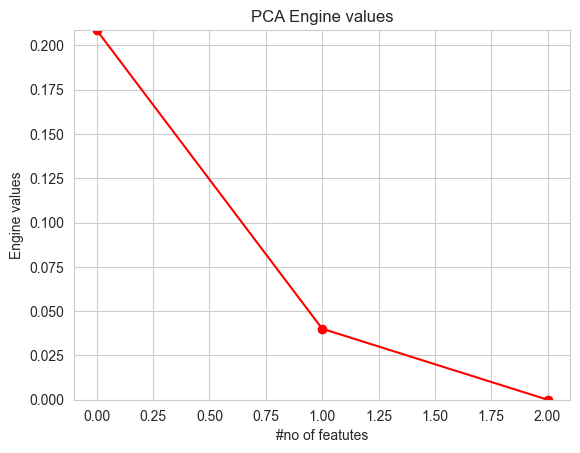

In [70]:
# check PCA

from screeplot import scree as sp
sp.scree_plot(x)

# Model training


In [71]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=45)

In [72]:
x_train.shape

(7729, 3)

In [73]:
y_train.shape

(7729, 1)

In [74]:
x_test.shape

(1933, 3)

In [75]:
y_test.shape

(1933, 1)

In [76]:
# import required library and using LInearegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import cross_val_score
lr=LinearRegression()
lr.fit(x_train,y_train)
y_test_pred=lr.predict(x_test)
R2_score=r2_score(y_test,y_test_pred)
mse=mean_squared_error(y_test,y_test_pred)
mae=mean_absolute_error(y_test,y_test_pred)
c_v_score=cross_val_score(lr,x,y,cv=10,scoring="r2").mean()
print("mean_squared error value :",mse)
print("mean absolute error value :",mae)
print("R2 score value :",R2_score)
print("cross validation score :",c_v_score)

mean_squared error value : 76498964.44369943
mean absolute error value : 6731.670650619624
R2 score value : 0.5720863208020172
cross validation score : 0.5664745973329602


In [77]:
# model fit for Ridge regressior
rd=Ridge()
rd.fit(x_train,y_train)
test_pred=rd.predict(x_test)
R2_score=r2_score(y_test,test_pred)
mse=mean_squared_error(y_test,test_pred)
mae=mean_absolute_error(y_test,test_pred)
c_v_score=cross_val_score(rd,x,y,cv=10,scoring="r2").mean()
print("mean_squared error value :",mse)
print("mean absolute error value :",mae)
print("R2 score value :",R2_score)
print("cross validation score :",c_v_score)

mean_squared error value : 76500878.48064254
mean absolute error value : 6731.602865263322
R2 score value : 0.5720756142179948
cross validation score : 0.566474753535206


In [78]:
# using lasso regressor
ls=Lasso()
ls.fit(x_train,y_train)
y_test_pred=ls.predict(x_test)
R2_score=r2_score(y_test,y_test_pred)
Mse=mean_squared_error(y_test,y_test_pred)
Mae=mean_absolute_error(y_test,y_test_pred)
c_v_score=cross_val_score(ls,x,y,cv=10,scoring="r2").mean()
print("mean_squared error value :",Mse)
print("mean absolute error value :",Mae)
print("R2 score value :",R2_score)
print("cross validation score :",c_v_score)


mean_squared error value : 76500267.51567878
mean absolute error value : 6731.681260998363
R2 score value : 0.5720790317840678
cross validation score : 0.5664797968842139


In [88]:
# using ElasticNEt
from sklearn.linear_model import ElasticNet
en=ElasticNet()
en.fit(x_train,y_train)
y_pred=en.predict(x_test)
R2_score=r2_score(y_test,y_pred)
Mse=mean_squared_error(y_test,y_pred)
Mae=mean_absolute_error(y_test,y_pred)
c_v_score=cross_val_score(en,x,y,cv=10,scoring="r2").mean()
print(f"mean_squared error value :{Mse}")
print(f"mean absolute error value :{Mae}")
print(f"R2 score value :{R2_score}")
print(f"cross validation score :{c_v_score}")

mean_squared error value :128145292.76520334
mean absolute error value :9448.322964964284
R2 score value :0.2831912941851972
cross validation score :0.2835938274343848


In [89]:
# support vector regressor
from sklearn.svm import SVR
sr=SVR()
sr.fit(x_train,y_train)
y_pred=sr.predict(x_test)
R2_score=r2_score(y_test,y_pred)
Mse=mean_squared_error(y_test,y_pred)
Mae=mean_absolute_error(y_test,y_pred)
c_v_score=cross_val_score(sr,x,y,cv=10,scoring="r2").mean()
print(f"mean_squared error value :{Mse}")
print(f"mean absolute error value :{Mae}")
print(f"R2 score value :{R2_score}")
print(f"cross validation score :{c_v_score}")

mean_squared error value :149218672.79042265
mean absolute error value :10288.738961110428
R2 score value :0.16531273667393176
cross validation score :0.18257612922870545


In [90]:
# using kneighbor regressor
from sklearn.neighbors import KNeighborsRegressor
kr=KNeighborsRegressor()
kr.fit(x_train,y_train)
y_pred=kr.predict(x_test)
R2_score=r2_score(y_test,y_pred)
Mse=mean_squared_error(y_test,y_pred)
Mae=mean_absolute_error(y_test,y_pred)
c_v_score=cross_val_score(kr,x,y,cv=10,scoring="r2").mean()
print(f"mean_squared error value :{Mse}")
print(f"mean absolute error value :{Mae}")
print(f"R2 score value :{R2_score}")
print(f"cross validation score :{c_v_score}")

mean_squared error value :89589459.36562791
mean absolute error value :7238.186986557703
R2 score value :0.49886177606079374
cross validation score :0.4868401928280937


In [91]:
# using randomforest regressor
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
R2_score=r2_score(y_test,y_pred)
Mse=mean_squared_error(y_test,y_pred)
Mae=mean_absolute_error(y_test,y_pred)
c_v_score=cross_val_score(rf,x,y,cv=10,scoring="r2").mean()
print(f"mean_squared error value :{Mse}")
print(f"mean absolute error value :{Mae}")
print(f"R2 score value :{R2_score}")
print(f"cross validation score :{c_v_score}")


mean_squared error value :110137812.33850764
mean absolute error value :8026.464068761618
R2 score value :0.3839200721302124
cross validation score :0.3812212773713679


In [92]:
# using dicisiontreeregressor
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
R2_score=r2_score(y_test,y_pred)
Mse=mean_squared_error(y_test,y_pred)
Mae=mean_absolute_error(y_test,y_pred)
c_v_score=cross_val_score(dt,x,y,cv=10,scoring="r2").mean()
print(f"mean_squared error value :{Mse}")
print(f"mean absolute error value :{Mae}")
print(f"R2 score value :{R2_score}")
print(f"cross validation score :{c_v_score}")

mean_squared error value :150749874.96624884
mean absolute error value :9380.607489314063
R2 score value :0.15674762260449915
cross validation score :0.16228790372107277


In [80]:
# create pipeline
from sklearn.pipeline import Pipeline
model=Pipeline(steps=[('MinMaxScaler',MinMaxScaler()),('LinearRegression',LinearRegression())])

In [81]:
model

Pipeline(steps=[('MinMaxScaler', MinMaxScaler()),
                ('LinearRegression', LinearRegression())])

In [82]:
final_model=model.fit(x_train,y_train)

In [83]:
final_model.predict(x_test)

array([[39975.60007821],
       [39895.68290627],
       [39978.80051849],
       ...,
       [17947.5380064 ],
       [17951.61849125],
       [39977.2102272 ]])

In [84]:
import joblib
import pickle
model=joblib.dump(final_model,"C:\\Credit_card_pred\\credit_card.pkl")

In [93]:
model

['C:\\Credit_card_pred\\credit_card.pkl']